<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Pembelajaran_Mesin_Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

# **Langkah 1 - Import Library**

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload() # upload dataset

Saving Iris.csv to Iris.csv


# **Langkah 2 - Load dan Inspeksi Data**

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


melakukan inspeksi profile data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


didapatkan informasi bahwa terdapat 150 data dan tidak ada missing values pada seluruh variabel.

# **Langkah 3 - Seleksi Fitur**

In [ ]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

Cek data fitur dengan cara

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


# **Langkah 4 - Plotting**

Pada tahap ini, kita akan melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu SepalLengthCm dan SepalWidthCm.

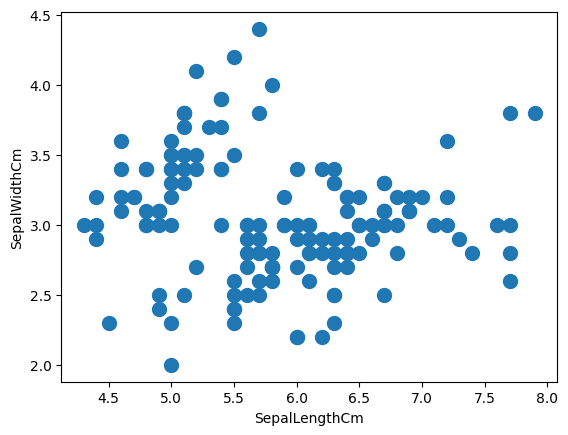

In [ ]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

# **Langkah 5 - Membuat Model K-Means**

kita akan membuat model K-Means dengan asumsi terdapat dua cluster sesuai dengan amatan visual pada scatterplot.

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

Setelah model mempelajari data yang kita miliki melalui fungsi fit_predict(), kita dapat melakukan pengecekan hasil klasterisasi dengan memanfaatkan scatterplot.

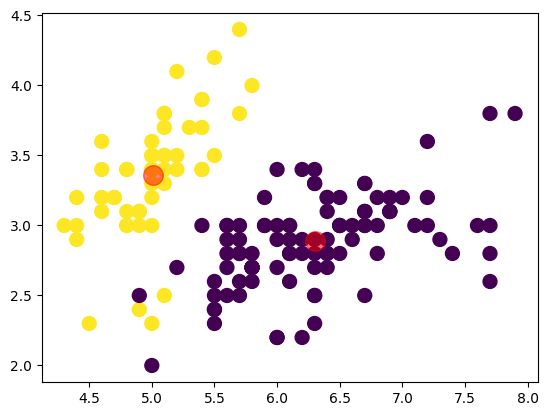

In [ ]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# **Langkah 6 - Evaluasi Model**

In [ ]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


# **Langkah 7 - Menentukan k terbaik dengan Elbow Method**

Pada pembuatan model klasterisasi, jika kita masih belum menentukan jumlah cluster yang akan digunakan, maka kita dapat menggunakan elbow method untuk mendapatkan jumlah cluster yang terbaik

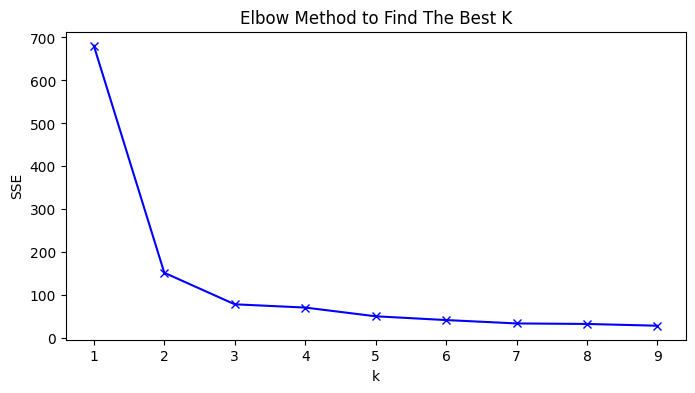

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

# **Praktikum 2**

# **Langkah 0 - Import Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Langkah 1 - Membuat Dataset Sintentis**

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Lakukan proses plotting data untuk mengetahui hasil dataset yang telah dibuat.

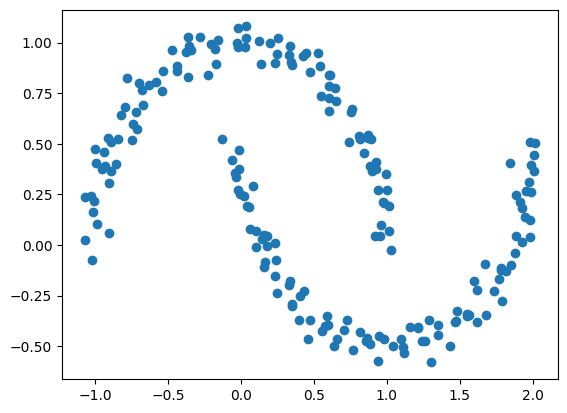

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

# **Langkah 2 - Klasterisasi dengan K-Means**

Membuat model KMeans dan melakukan plotting ulang hasil klasterisasi

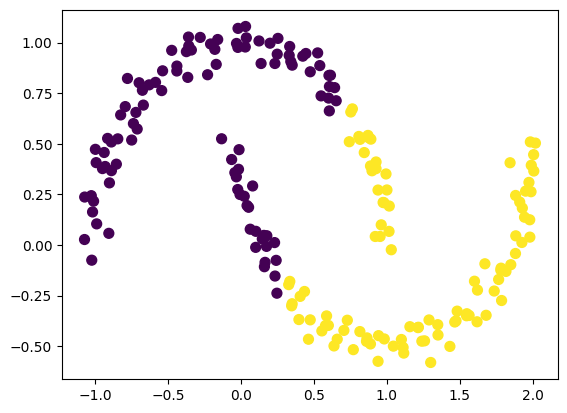

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

melakukan evaluasi lebih lanjut dengan menggunakan silhoutte coefficient

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


# **Langkah 3 - Klasterisasi dengan DBSCAN**

melakukan klasterisasi dengan DBSCAN

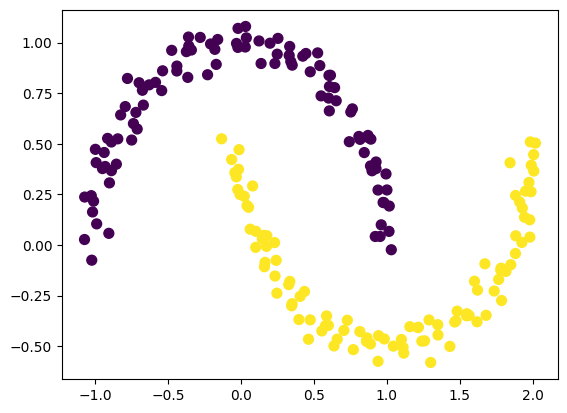

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Berdasarkan scatterplot, data dapat terklasterisasi dengan sangat baik. Untuk memastikannya, perlu melakukan evaluasi kembali dengan silhoutte score.

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Hasil 0.32585318950197517

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# **Praktikum 3**

# **Langkah 0 - Import Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Langkah 1 - Load Data Citra**

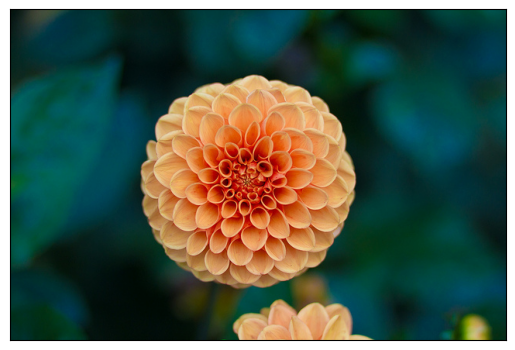

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

# **Langkah 2 - Preprocessing**

melakukan pengecekan ukuran citra dan normalisasi warna

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


# **Langkah 3 - Cek Sebaran Warna**

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Panggil fungsi untuk mengetahui sebaran warna,

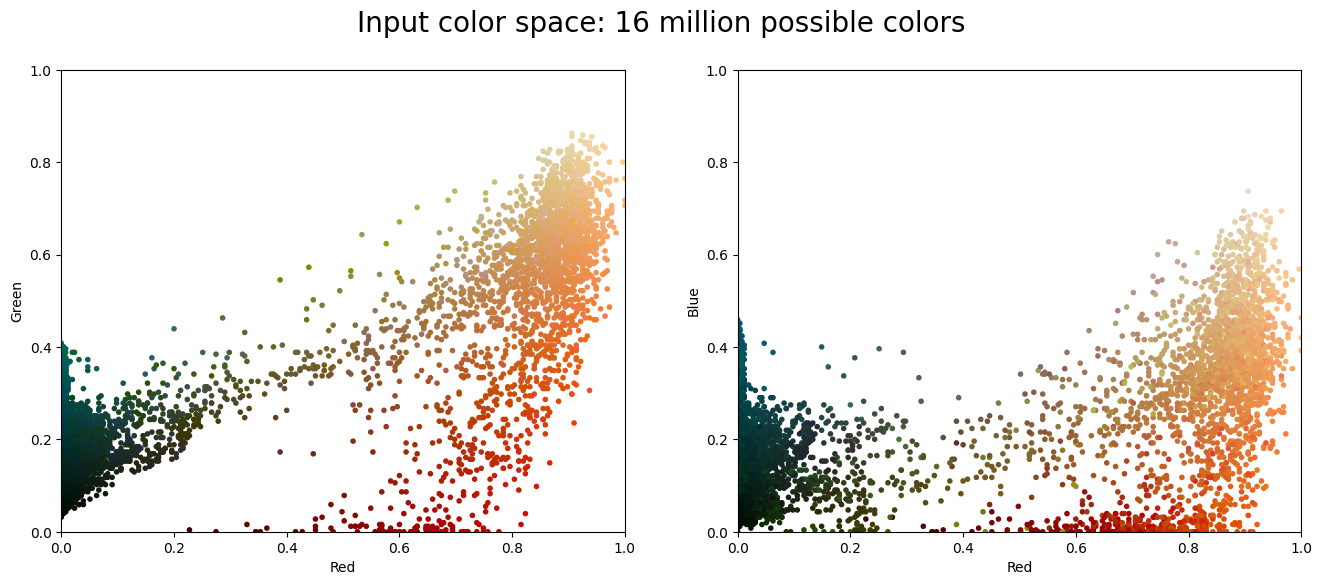

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# **Langkah 4 - Klasterisasi Warna**

melakukan klasterisasi hanya dengan 16 warna saja.

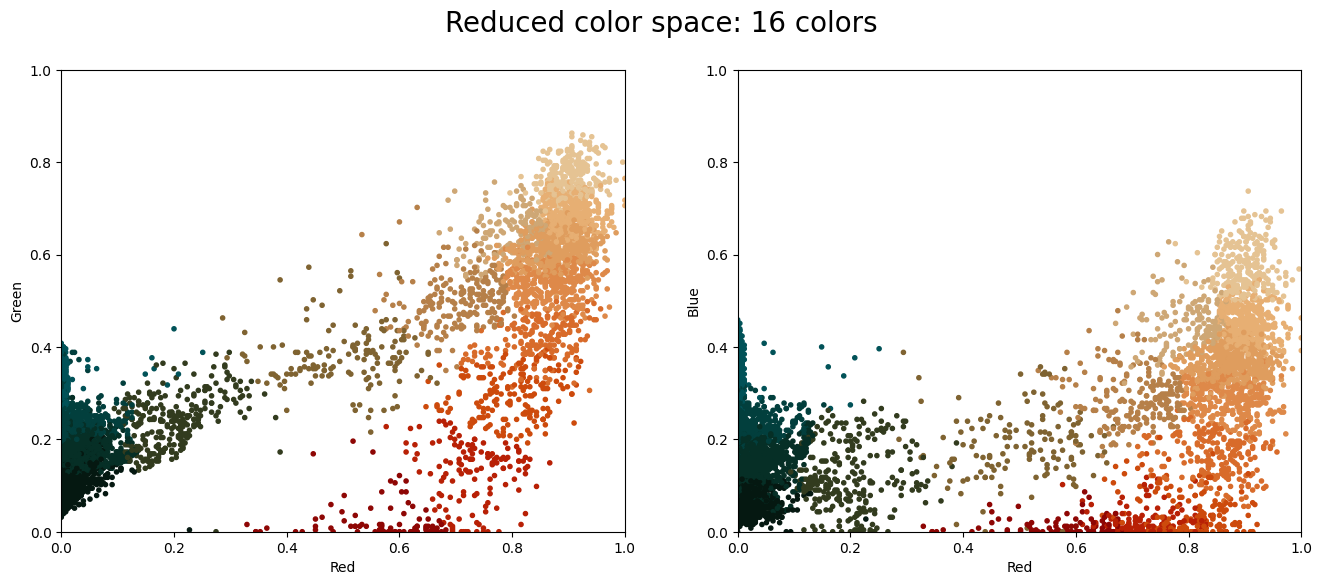

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,

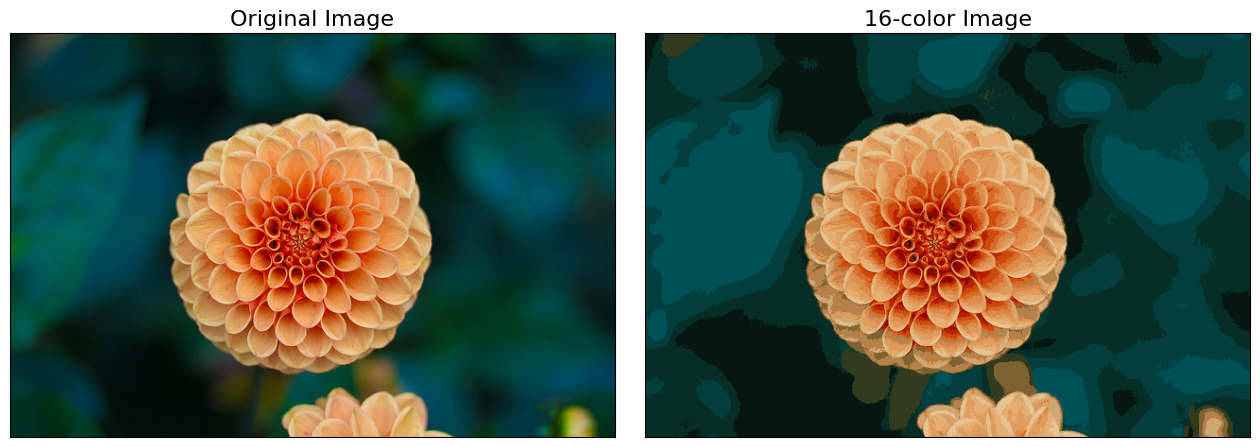

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# **Tugas Pratikum**

1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

Saving CC_Customer_Dataset.csv to CC_Customer_Dataset.csv


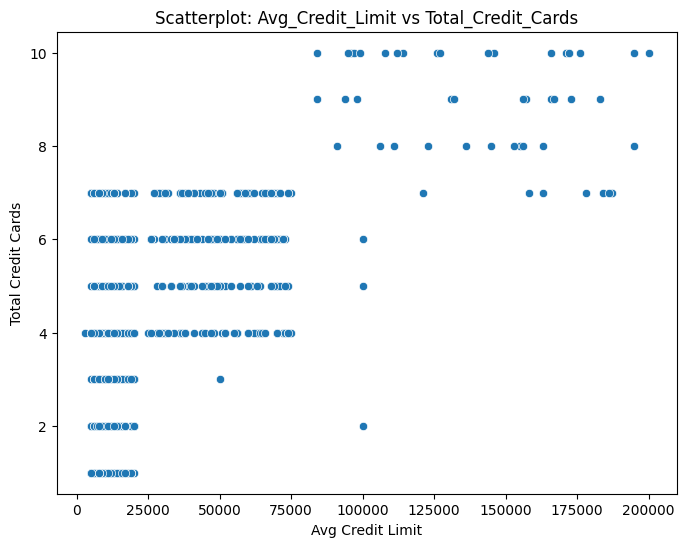

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file dari lokal
uploaded = files.upload()

# Baca dataset
df = pd.read_csv("CC_Customer_Dataset.csv")

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.title("Scatterplot: Avg_Credit_Limit vs Total_Credit_Cards")
plt.xlabel("Avg Credit Limit")
plt.ylabel("Total Credit Cards")
plt.show()


2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

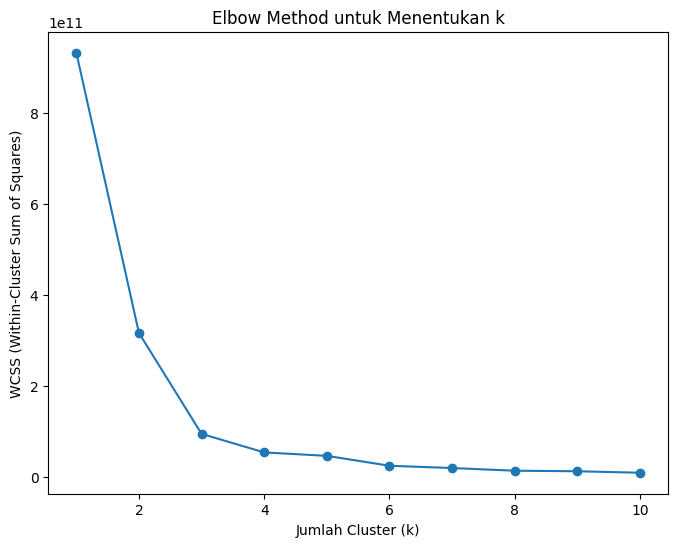

In [ ]:
X = df[["Avg_Credit_Limit", "Total_Credit_Cards"]]

wcss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = nilai WCSS

# Plot elbow method
plt.figure(figsize=(8,6))
plt.plot(K, wcss, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method untuk Menentukan k")
plt.show()

3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

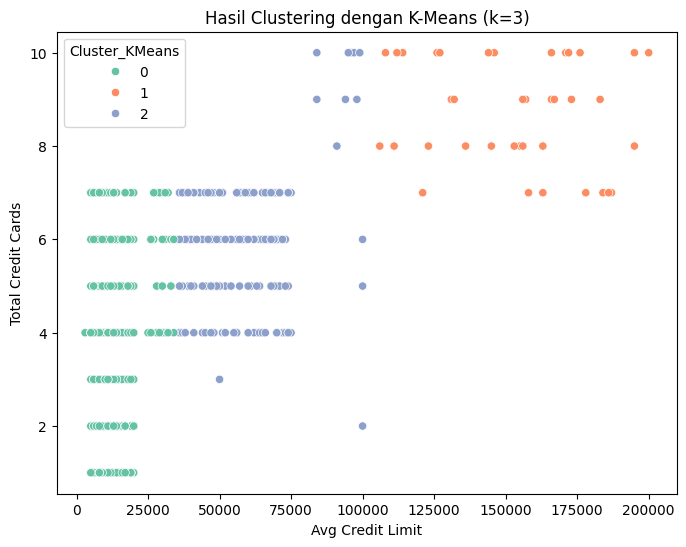

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

# Plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards",
                hue="Cluster_KMeans", data=df, palette="Set2")
plt.title("Hasil Clustering dengan K-Means (k=3)")
plt.xlabel("Avg Credit Limit")
plt.ylabel("Total Credit Cards")
plt.show()

4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.

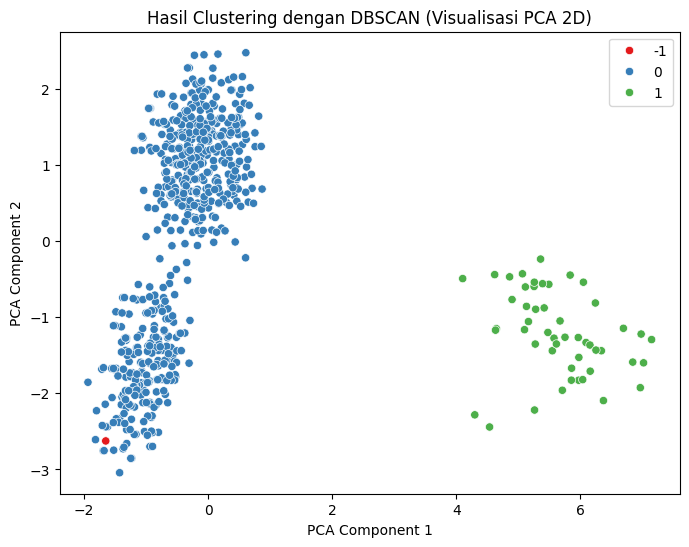

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D pakai PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil clustering DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_labels, palette="Set1", legend="full")
plt.title("Hasil Clustering dengan DBSCAN (Visualisasi PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


5. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

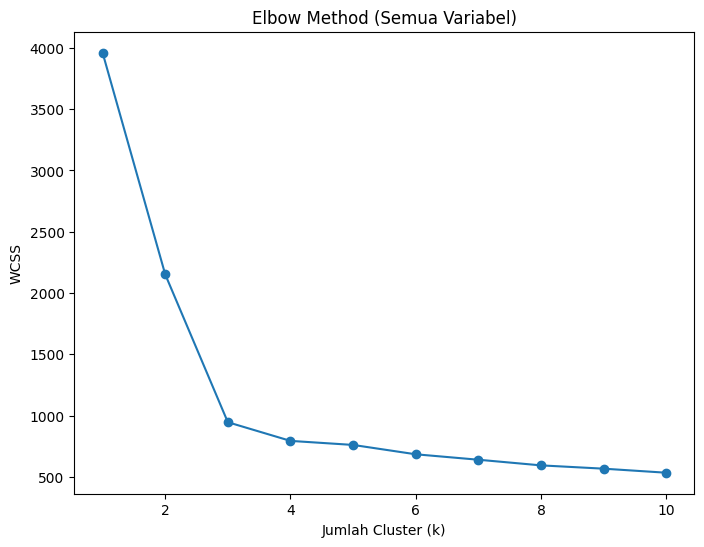

In [ ]:
wcss2 = []
K2 = range(1,11)
for k in K2:
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(X_scaled)
    wcss2.append(kmeans2.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K2, wcss2, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (Semua Variabel)")
plt.show()

6. Tentukan nilai silhouette score dan DBI dari model DBSCAN

In [ ]:
# Silhouette Score semakin tinggi semakin baik
# DBI: semakin rendah semakin baik
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    sil_score = silhouette_score(X_scaled, dbscan_labels)
    dbi_score = davies_bouldin_score(X_scaled, dbscan_labels)
else:
    sil_score = "Tidak dapat dihitung (hanya 1 cluster atau banyak noise)"
    dbi_score = "Tidak dapat dihitung"

print("Silhouette Score (DBSCAN):", sil_score)
print("Davies-Bouldin Index (DBSCAN):", dbi_score)

Silhouette Score (DBSCAN): Tidak dapat dihitung (hanya 1 cluster atau banyak noise)
Davies-Bouldin Index (DBSCAN): Tidak dapat dihitung


Kesimpulan :    

Dari praktikum diatas dapat disimpulkan bahwa metode yang digunakan untuk masalah klasterisasi adalah K-Means. Unsupervised learning menggunakan kumpulan data dengan label atau kelas yang tidak diketahui. dengan tujuan untuk menemukan pola data berdasarkan kemiripan data. Algoritma K-Means mengambil dataset yang tidak berlabel sebagai input, kemudian membagi dataset menjadi sejumlah k cluster, dan mengulangi proses tersebut sampai tidak menemukan cluster terbaik. Nilai k harus ditentukan sebelumnya dalam algoritma ini.

DBSCAN adalah algoritma klasterisasi berbasis kepadatan (density-based clustering algorithm) yang bertujuan menemukan kelompok data (klaster) sebagai wilayah dengan kepadatan tinggi yang dipisahkan oleh wilayah berkepadatan rendah. Berbeda dengan algoritma berbasis centroid (misalnya K-Means), DBSCAN tidak memerlukan informasi jumlah klaster sejak awal, dan dapat mengenali bentuk klaster yang tidak teratur